In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("../data/Walmart.csv")
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [9]:
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
df.dtypes


Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

NameError: name 'df' is not defined

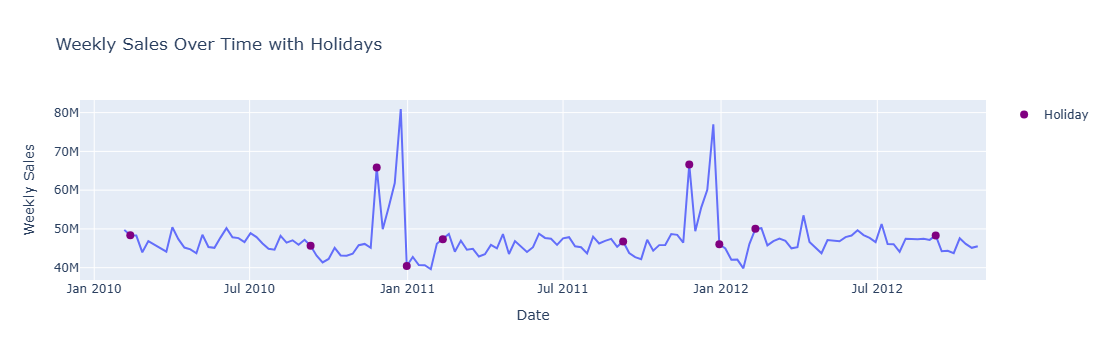

In [42]:
# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Group by week for total sales
weekly_sales = df.groupby('Date', as_index=False)['Weekly_Sales'].sum()

# Filter holidays
holiday_sales = df[df['Holiday_Flag'] == 1].groupby('Date', as_index=False)['Weekly_Sales'].sum()

# Plot main line chart
fig = px.line(weekly_sales, x='Date', y='Weekly_Sales', title='Weekly Sales Over Time with Holidays',
              labels={'Date': 'Date', 'Weekly_Sales': 'Weekly Sales'})

# Add holiday markers
fig.add_scatter(x=holiday_sales['Date'], y=holiday_sales['Weekly_Sales'],
                mode='markers',
                marker=dict(color='purple', size=8, symbol='circle'),
                name='Holiday')

fig.show()


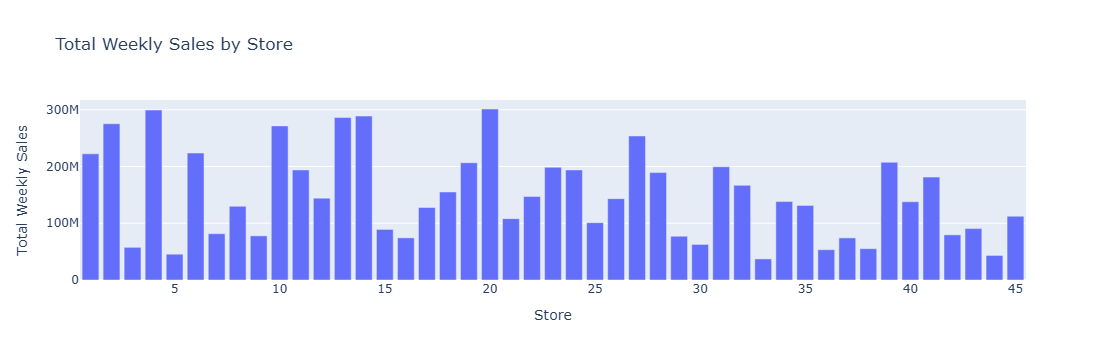

In [44]:
# Group total sales by Store
store_sales = df.groupby('Store', as_index=False)['Weekly_Sales'].sum()

# Create bar chart
fig = px.bar(store_sales, 
             x='Store', 
             y='Weekly_Sales', 
             title='Total Weekly Sales by Store',
             labels={'Store': 'Store', 'Weekly_Sales': 'Total Weekly Sales'})

fig.show()


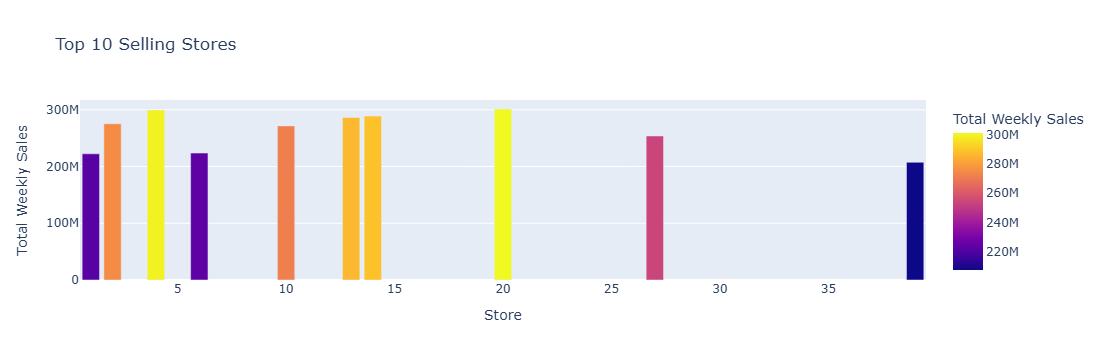

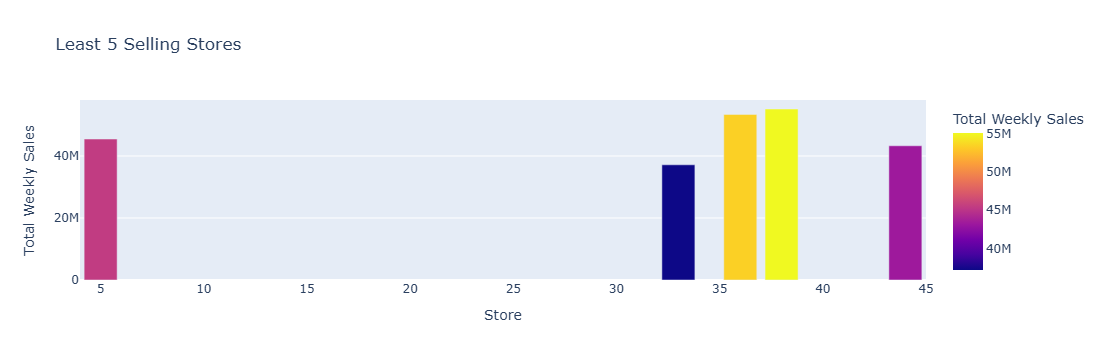

In [48]:
# Top 10 selling stores
top_10_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False).head(10)

# Bar chart for top 10 stores
fig_top = px.bar(top_10_stores,
                 x='Store',
                 y='Weekly_Sales',
                 title='Top 10 Selling Stores',
                 labels={'Store': 'Store', 'Weekly_Sales': 'Total Weekly Sales'},
                 color='Weekly_Sales')
fig_top.show()

# Least 5 selling stores
least_5_stores = store_sales.sort_values(by='Weekly_Sales', ascending=True).head(5)

# Bar chart for least 5 stores
fig_least = px.bar(least_5_stores,
                   x='Store',
                   y='Weekly_Sales',
                   title='Least 5 Selling Stores',
                   labels={'Store': 'Store', 'Weekly_Sales': 'Total Weekly Sales'},
                   color='Weekly_Sales')
fig_least.show()


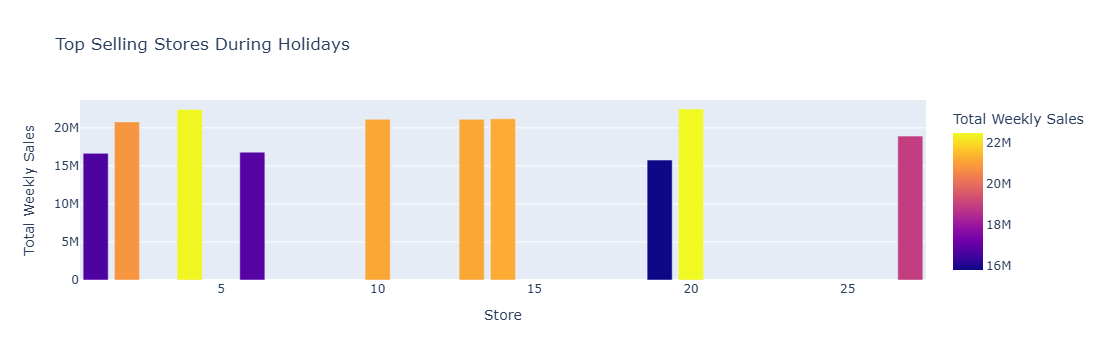

In [50]:
# Filter only holiday rows
holiday_df = df[df['Holiday_Flag'] == 1]

# Group by Store and sum Weekly Sales
holiday_store_sales = holiday_df.groupby('Store', as_index=False)['Weekly_Sales'].sum()

# Sort and get top selling stores during holidays
top_holiday_stores = holiday_store_sales.sort_values(by='Weekly_Sales', ascending=False).head(10)

# Plot top selling stores during holidays
fig = px.bar(top_holiday_stores,
             x='Store',
             y='Weekly_Sales',
             title='Top Selling Stores During Holidays',
             labels={'Store': 'Store', 'Weekly_Sales': 'Total Weekly Sales'},
             color='Weekly_Sales')
fig.show()


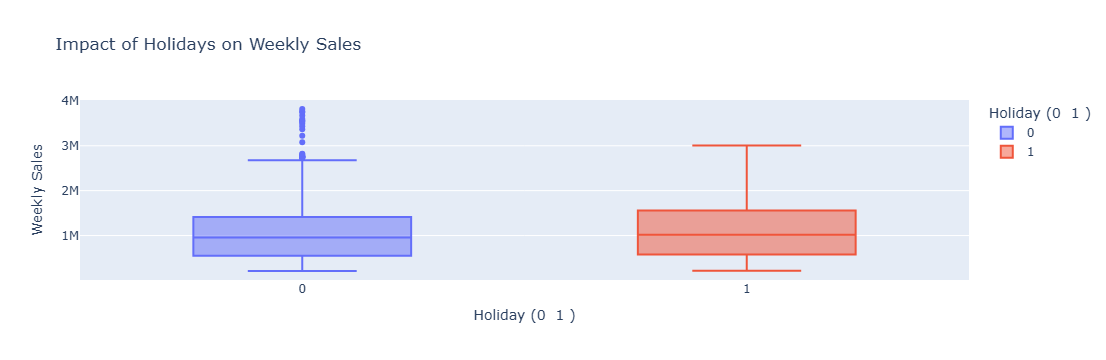

In [54]:
# Box plot to compare Weekly Sales on holidays vs non-holidays
fig = px.box(df,
             x='Holiday_Flag',
             y='Weekly_Sales',
             title='Impact of Holidays on Weekly Sales',
             labels={'Holiday_Flag': 'Holiday (0  1 )', 'Weekly_Sales': 'Weekly Sales'},
             color='Holiday_Flag')
fig.show()


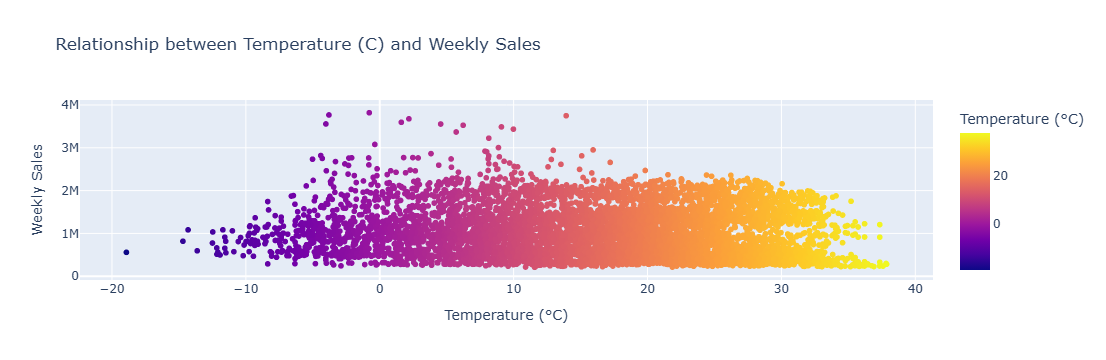

In [58]:
# Convert Temperature from Fahrenheit to Celsius
df['Temperature_C'] = (df['Temperature'] - 32) * 5 / 9

# Scatter plot to investigate the relationship between Temperature (Celsius) and Weekly Sales
fig = px.scatter(df,
                 x='Temperature_C',
                 y='Weekly_Sales',
                 title='Relationship between Temperature (C) and Weekly Sales',
                 labels={'Temperature_C': 'Temperature (°C)', 'Weekly_Sales': 'Weekly Sales'},
                 color='Temperature_C')
fig.show()


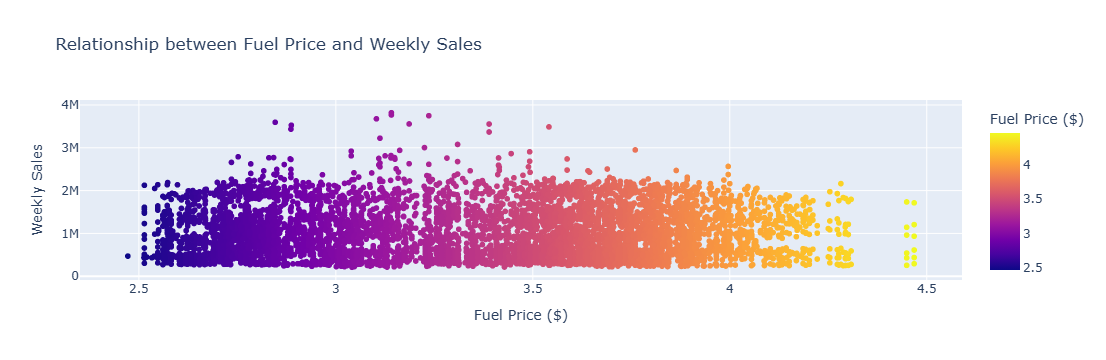

In [62]:
# Scatter plot to investigate the relationship between Fuel Price and Weekly Sales
fig = px.scatter(df,
                 x='Fuel_Price',
                 y='Weekly_Sales',
                 title='Relationship between Fuel Price and Weekly Sales',
                 labels={'Fuel_Price': 'Fuel Price ($)', 'Weekly_Sales': 'Weekly Sales'},
                 color='Fuel_Price')
fig.show()


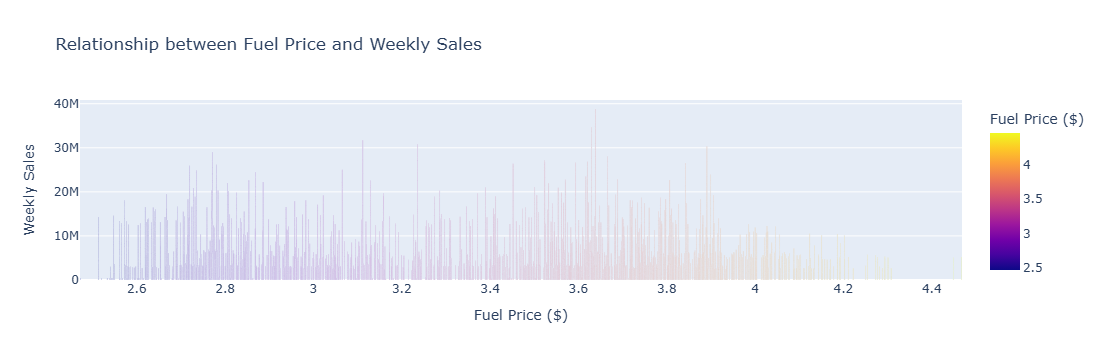

In [68]:
# Bar chart to investigate the relationship between Fuel Price and Weekly Sales
fig = px.bar(df,
             x='Fuel_Price',
             y='Weekly_Sales',
             title='Relationship between Fuel Price and Weekly Sales',
             labels={'Fuel_Price': 'Fuel Price ($)', 'Weekly_Sales': 'Weekly Sales'},
             color='Fuel_Price')
fig.show()


In [70]:
# Filter stores where Fuel Price is less than 3.5
df_less_than_3_5 = df[df['Fuel_Price'] < 3.5]

# Filter stores where Fuel Price is greater than or equal to 3.5
df_greater_than_3_5 = df[df['Fuel_Price'] >= 3.5]

# Calculate the sum of Weekly Sales for both groups
sales_less_than_3_5 = df_less_than_3_5['Weekly_Sales'].sum()
sales_greater_than_3_5 = df_greater_than_3_5['Weekly_Sales'].sum()

# Print the results
print(f'Total Weekly Sales for stores with Fuel Price less than $3.5: ${sales_less_than_3_5:,.2f}')
print(f'Total Weekly Sales for stores with Fuel Price greater than or equal to $3.5: ${sales_greater_than_3_5:,.2f}')


Total Weekly Sales for stores with Fuel Price less than $3.5: $3,578,271,695.98
Total Weekly Sales for stores with Fuel Price greater than or equal to $3.5: $3,158,947,291.13


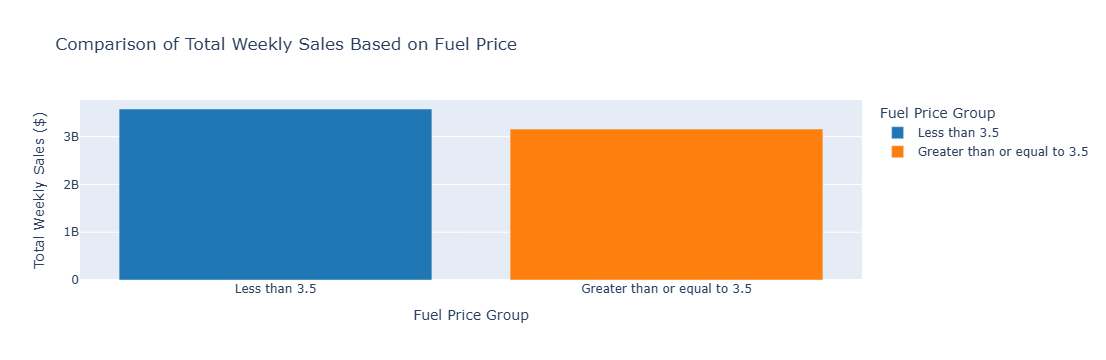

In [74]:
# Create a new dataframe to hold the summed sales for each group
sales_comparison = pd.DataFrame({
    'Fuel_Price Group': ['Less than 3.5', 'Greater than or equal to 3.5'],
    'Total Weekly Sales': [sales_less_than_3_5, sales_greater_than_3_5]
})

# Bar chart to compare total sales between the two groups
fig = px.bar(sales_comparison,
             x='Fuel_Price Group',
             y='Total Weekly Sales',
             title='Comparison of Total Weekly Sales Based on Fuel Price',
             labels={'Fuel_Price Group': 'Fuel Price Group', 'Total Weekly Sales': 'Total Weekly Sales ($)'},
             color='Fuel_Price Group',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])  # You can customize the colors as needed
fig.show()


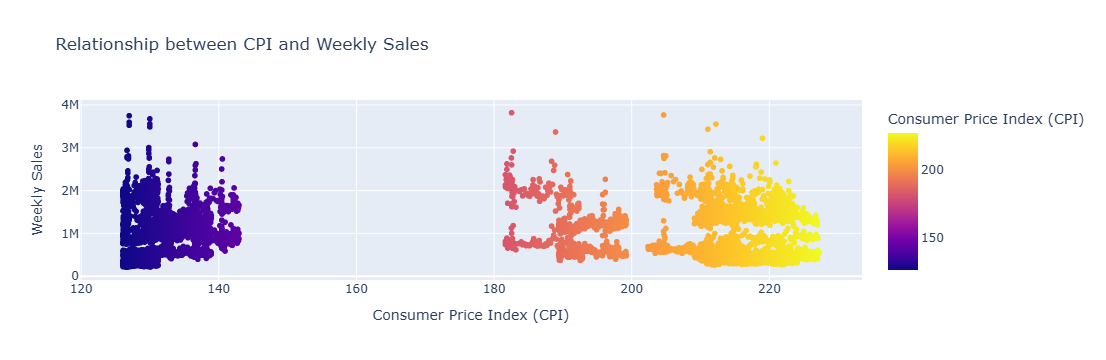

In [76]:
# Scatter plot to examine the relationship between CPI and Weekly Sales
fig_cpi = px.scatter(df,
                     x='CPI',
                     y='Weekly_Sales',
                     title='Relationship between CPI and Weekly Sales',
                     labels={'CPI': 'Consumer Price Index (CPI)', 'Weekly_Sales': 'Weekly Sales'},
                     color='CPI')
fig_cpi.show()


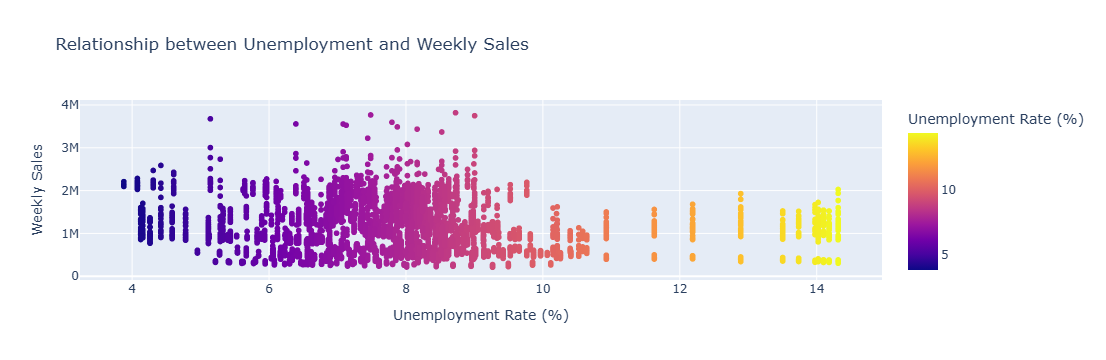

In [78]:
# Scatter plot to examine the relationship between Unemployment and Weekly Sales
fig_unemployment = px.scatter(df,
                               x='Unemployment',
                               y='Weekly_Sales',
                               title='Relationship between Unemployment and Weekly Sales',
                               labels={'Unemployment': 'Unemployment Rate (%)', 'Weekly_Sales': 'Weekly Sales'},
                               color='Unemployment')
fig_unemployment.show()


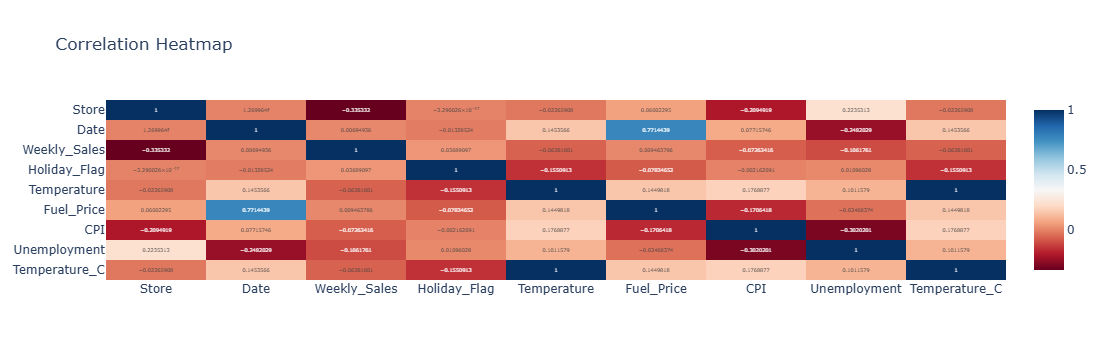

In [82]:
corr_matrix = df.corr()

# Create a heatmap with a blue to red color scale
fig = px.imshow(corr_matrix, 
                text_auto=True, 
                aspect="auto", 
                title="Correlation Heatmap",
                color_continuous_scale='RdBu')  

fig.show()

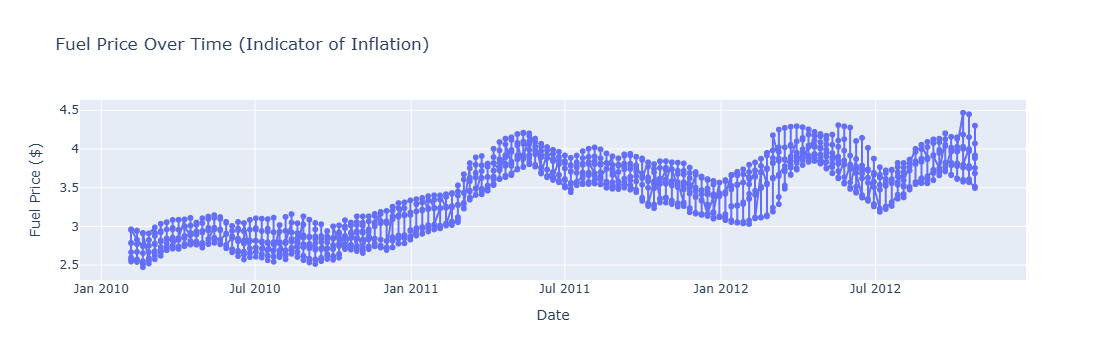

In [84]:
# Line chart to show how Fuel Price changes over time (indicating inflation)
fig = px.line(df,
              x='Date',
              y='Fuel_Price',
              title='Fuel Price Over Time (Indicator of Inflation)',
              labels={'Date': 'Date', 'Fuel_Price': 'Fuel Price ($)'},
              markers=True)
fig.show()


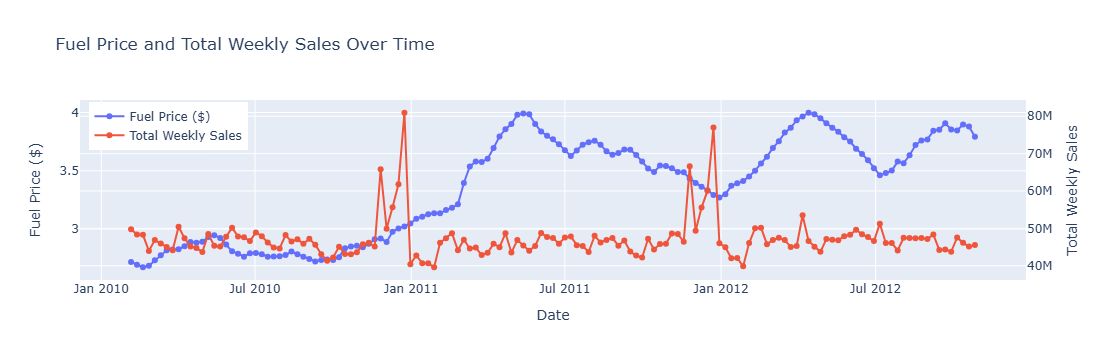

In [88]:
import plotly.graph_objects as go

# Make sure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date to get total sales per date
df_grouped = df.groupby('Date').agg({'Fuel_Price': 'mean', 'Weekly_Sales': 'sum'}).reset_index()

# Create figure
fig = go.Figure()

# Add fuel price line (left y-axis)
fig.add_trace(go.Scatter(x=df_grouped['Date'], y=df_grouped['Fuel_Price'],
                         name='Fuel Price ($)', yaxis='y1', mode='lines+markers'))

# Add total sales line (right y-axis)
fig.add_trace(go.Scatter(x=df_grouped['Date'], y=df_grouped['Weekly_Sales'],
                         name='Total Weekly Sales', yaxis='y2', mode='lines+markers'))

# Layout with dual y-axes
fig.update_layout(
    title='Fuel Price and Total Weekly Sales Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Fuel Price ($)', side='left'),
    yaxis2=dict(title='Total Weekly Sales', overlaying='y', side='right'),
    legend=dict(x=0.01, y=0.99),
)

fig.show()


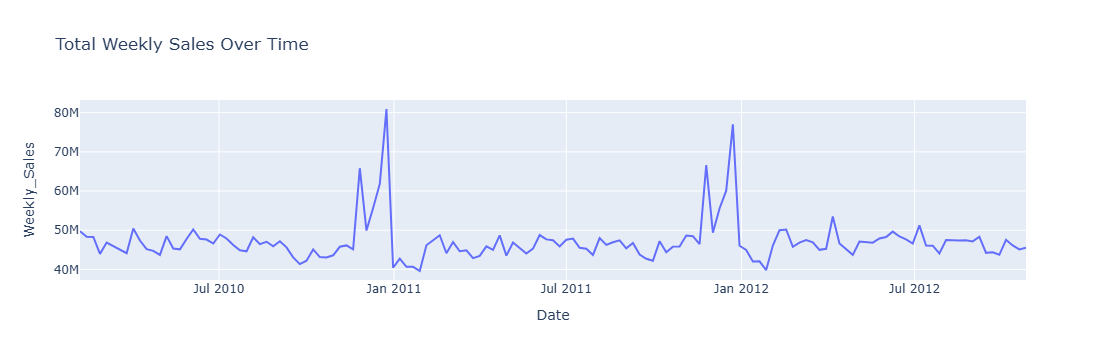

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df_aggregated = df.groupby('Date').sum().reset_index()

fig = px.line(df_aggregated, x='Date', y='Weekly_Sales', title='Total Weekly Sales Over Time')
fig.show()

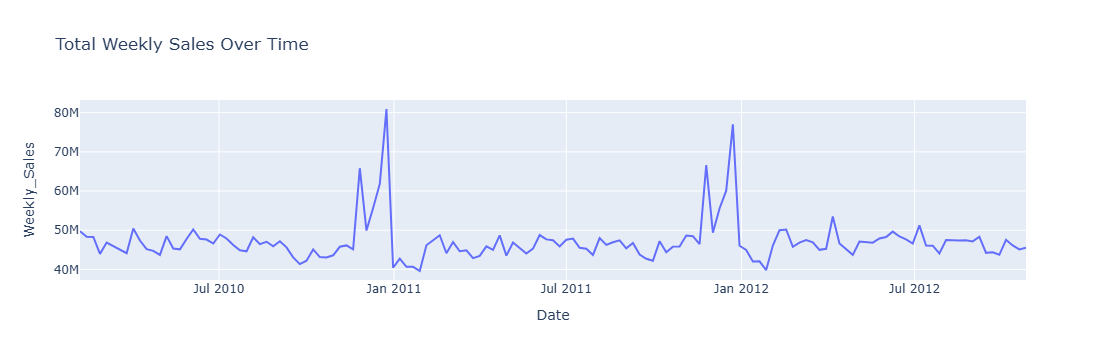

In [18]:

# Load the data
df = pd.read_csv("Walmart.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Aggregate sales by date
df_aggregated = df.groupby('Date').sum().reset_index()

# Line chart for aggregated sales over time
fig = px.line(df_aggregated, x='Date', y='Weekly_Sales', title='Total Weekly Sales Over Time')
fig.show()

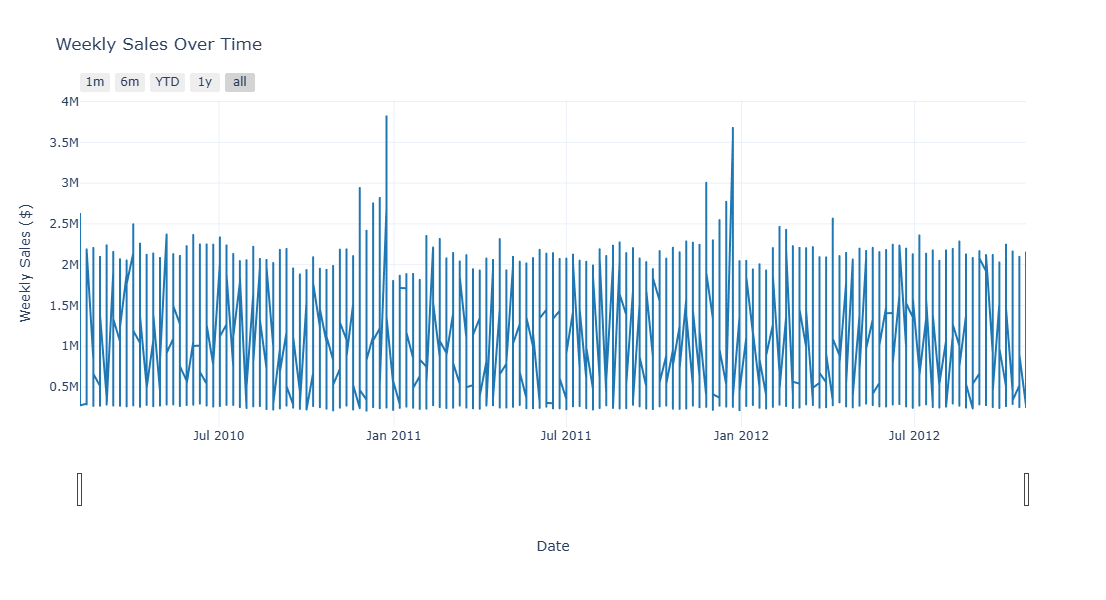

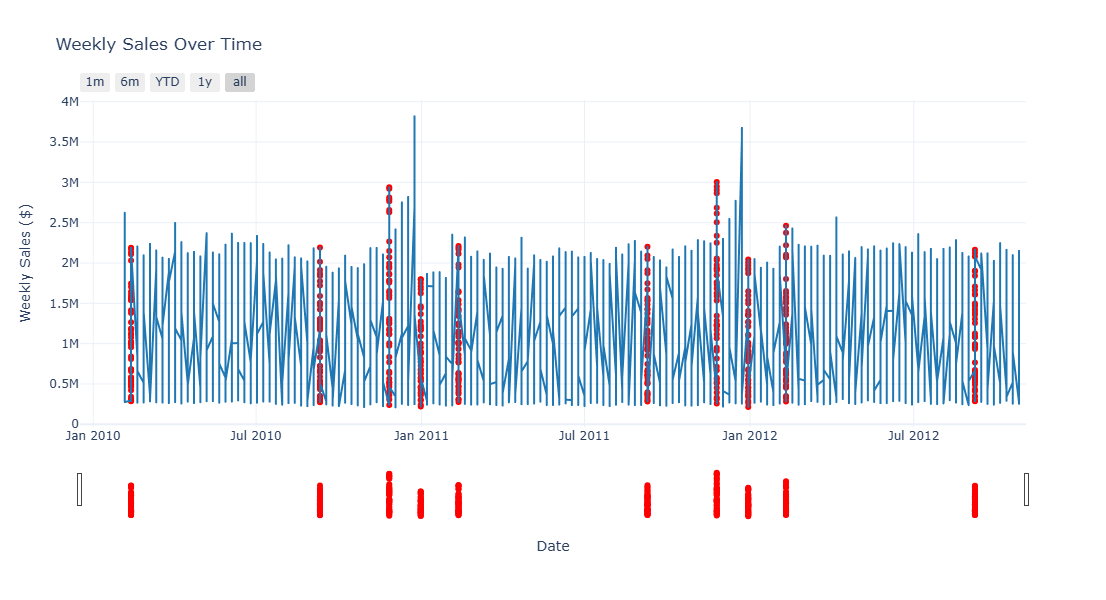

In [24]:

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort by date
df = df.sort_values('Date')

# Create interactive line chart
fig = px.line(df, 
              x='Date', 
              y='Weekly_Sales',
              title='Weekly Sales Over Time',
              labels={'Weekly_Sales': 'Weekly Sales ($)', 'Date': 'Date'},
              color_discrete_sequence=['#1f77b4'])

# Add range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Customize hover template
fig.update_traces(hovertemplate='<b>Date</b>: %{x|%d %b %Y}<br><b>Sales</b>: $%{y:,.0f}')

# Update layout
fig.update_layout(
    hovermode='x unified',
    template='plotly_white',
    height=600,
    showlegend=False
)

fig.show()
fig.add_scatter(
    x=df[df['Holiday_Flag'] == 1]['Date'],
    y=df[df['Holiday_Flag'] == 1]['Weekly_Sales'],
    mode='markers',
    marker=dict(color='red', size=6),
    name='Holiday Weeks'
)

In [91]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [60]:
unique_temp_values = df['Temperature'].nunique()
unique_temp_values

3528